In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classificationcation

In [7]:
from sklearn.model_selection import train_test_split
x, y = make_classification(n_samples = 2000, n_classes =2, weights=[1,1], random_state=1)

In [8]:
x.shape

(2000, 20)

In [9]:
y.shape

(2000,)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

pred = rf.predict_proba(x_train)

print("train_roc_curve:", roc_auc_score(y_train, pred[:,1]))

pred1 = rf.predict_proba(x_test)

print("test_roc_curve:", roc_auc_score( y_test, pred1[:,1]))

train_roc_curve: 1.0
test_roc_curve: 0.9832333333333333


In [14]:
from sklearn.linear_model import LogisticRegression

ls = LogisticRegression()
ls.fit(x_train, y_train)

pred = ls.predict_proba(x_train)

print("train_roc_curve:", roc_auc_score(y_train, pred[:,1]))

pred1 = rf.predict_proba(x_test)

print("test_roc_curve:", roc_auc_score( y_test, pred1[:,1]))


train_roc_curve: 0.9863568922694498
test_roc_curve: 0.9832333333333333


In [16]:
from sklearn.ensemble import AdaBoostClassifier

ac = AdaBoostClassifier()
ac.fit(x_train, y_train)

pred = ac.predict_proba(x_train)

print("train_roc_curve:", roc_auc_score(y_train, pred[:,1]))

pred1 = ac.predict_proba(x_test)

print("test_roc_curve:", roc_auc_score( y_test, pred1[:,1]))

train_roc_curve: 0.9975081174960356
test_roc_curve: 0.9826111111111111


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

pred = knn.predict_proba(x_train)

print("train_roc_curve:", roc_auc_score(y_train, pred[:,1]))

pred1 = knn.predict_proba(x_test)

print("test_roc_curve:", roc_auc_score( y_test, pred1[:,1]))

train_roc_curve: 0.981670071491109
test_roc_curve: 0.9426111111111111


In [19]:
pred = []
for model in [rf, ls, ac, knn]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_pred = pd.concat(pred,axis = 1).mean(axis = 1)
print("ensemble test roc-auc:", roc_auc_score(y_test, final_pred))

ensemble test roc-auc: 0.9850111111111112


In [35]:
final_pred.head()

0    0.887762
1    0.118323
2    0.818783
3    0.747853
4    0.537447
dtype: float64

In [22]:
fpr, tpr, threshold = roc_curve(y_test, final_pred)

In [23]:
threshold

array([1.91188114, 0.91188114, 0.8985034 , 0.89827475, 0.80202418,
       0.8005558 , 0.77925879, 0.77821156, 0.76303202, 0.76287124,
       0.72960041, 0.72887362, 0.70951656, 0.70393711, 0.68101868,
       0.67493537, 0.61029968, 0.60550386, 0.60462652, 0.59425354,
       0.5940152 , 0.59236186, 0.5771569 , 0.57389283, 0.55042732,
       0.54219563, 0.53595371, 0.53377948, 0.52865858, 0.47866892,
       0.45990225, 0.42722765, 0.4271034 , 0.37684818, 0.37629719,
       0.34933098, 0.34586612, 0.24901541, 0.24646893, 0.23348126,
       0.23140421, 0.19983682, 0.19848417, 0.12307604, 0.1228351 ,
       0.10498954])

In [29]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='roc')
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle='--')
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("receiver operating characteristic (roc) curve")
    plt.legend()
    plt.show()

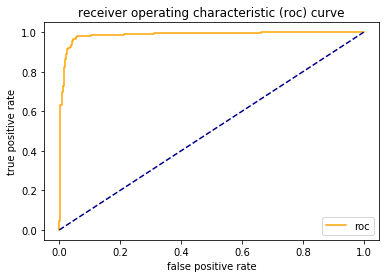

In [30]:
plot_roc_curve(fpr,tpr)

In [34]:
from sklearn.metrics import accuracy_score
accur = []
for thre in threshold:
    y_pred = np.where(final_pred>thre,1,0)
    accur.append(accuracy_score(y_test, y_pred, normalize = True))
    
accur = pd.concat([pd.Series(threshold), pd.Series(accur)], axis = 1)
accur.columns = ['threshold', 'Accuracy']
accur.sort_values(by='Accuracy', ascending=False, inplace=True)
accur.head()

,threshold,Accuracy
31,0.427228,0.961667
32,0.427103,0.960000
30,0.459902,0.960000
29,0.478669,0.958333
27,0.533779,0.958333
